# Data Analysis and Visualization

## Question: Is there a conflict of interest for a website that sells movie tickets and writes movie reviews?

Article related to this question: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

# Part 1: Exploratory Data Analaysis

In [1]:
# Load libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import data sets

sites = pd.read_csv('all_sites_scores.csv')
fandango = pd.read_csv('fandango_scrape.csv')


In [3]:
# Check data sets
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [41]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


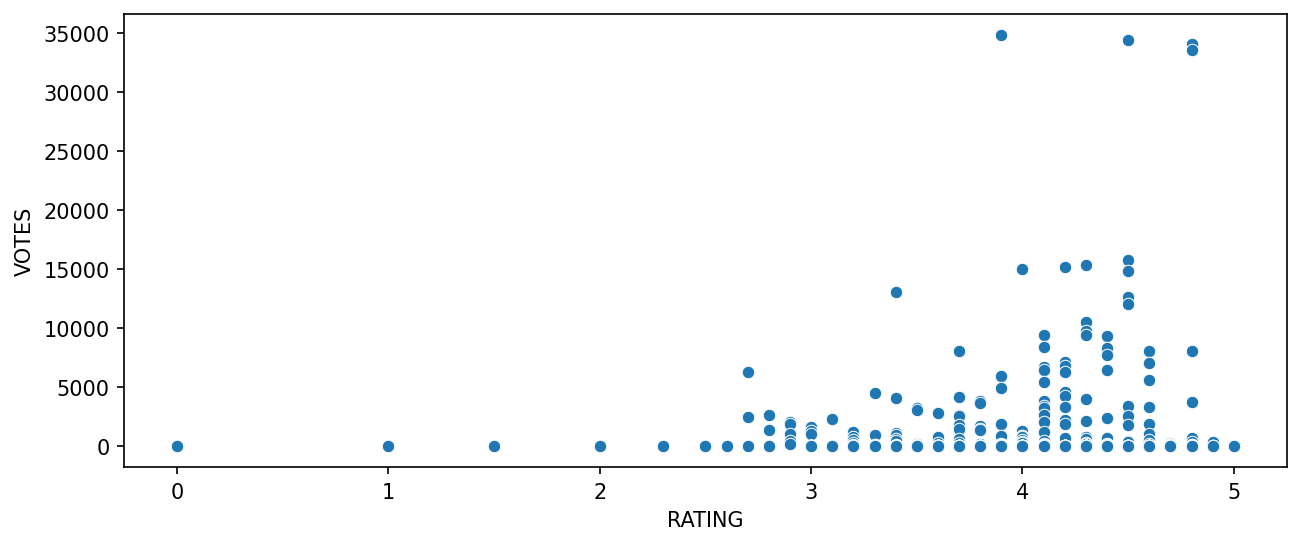

In [19]:
# Plot rating by number of votes

plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,y='VOTES',x='RATING');


In [8]:
# Corelation of variables
fandango.corr()              # stars an drating not perfectly corelated, although high
                             # indicates some difference between stars shown and true rating

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [11]:
# Extract Year and add new column

title = 'Film Title Name (Year)'

In [13]:
title.split('(')[-1].replace(')','')  #this will split the year from the film variable when lambda function is applied

'Year'

In [14]:
fandango['YEAR']= fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))

In [15]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [16]:
# how many unique years?

fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

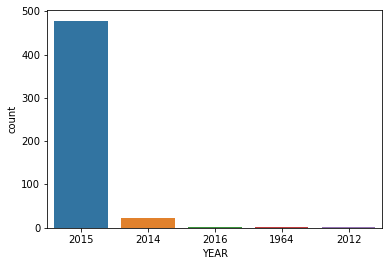

In [18]:
sns.countplot(data=fandango,x='YEAR');

In [20]:
# 10 movies with the highest number of votes
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [23]:
# Movies with 0 votes
no_votes = fandango['VOTES']==0
no_votes.sum()

69

In [25]:
# Remove movies with no votes
reviewed = fandango[fandango['VOTES']>0]
reviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


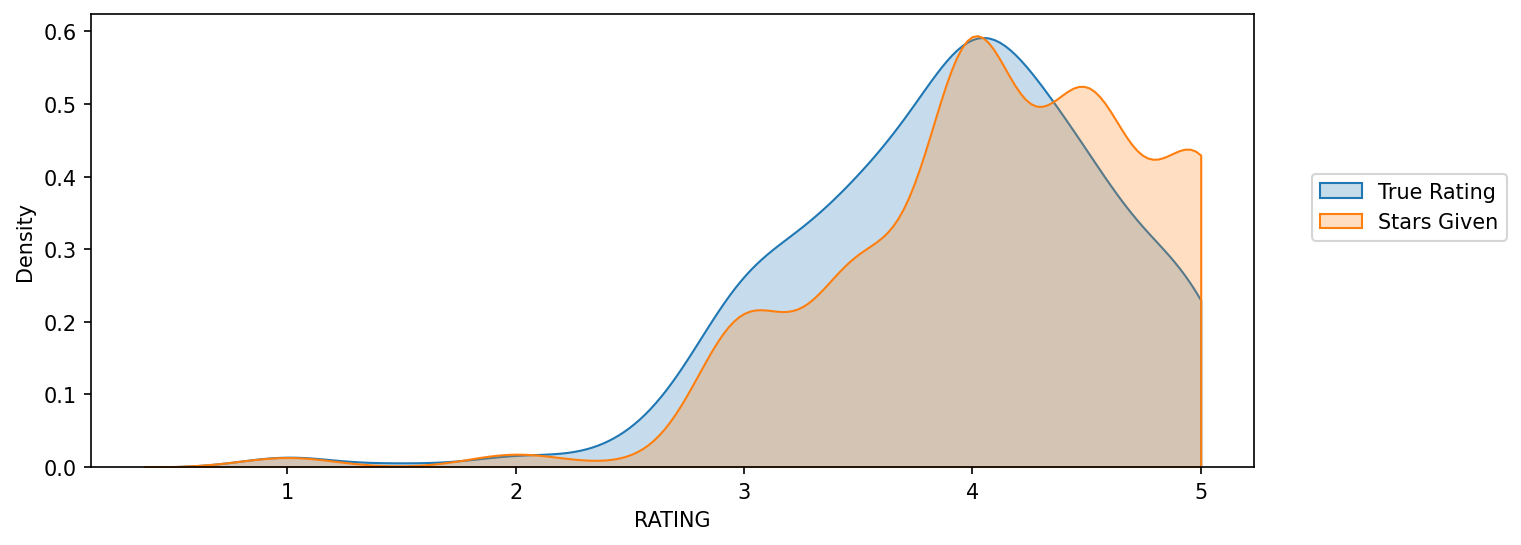

In [29]:
# Compoare stars given to true rating vidsually 

plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=reviewed,x='RATING',clip=[0,5],fill=True,label="True Rating")
sns.kdeplot(data=reviewed,x='STARS',clip=[0,5],fill=True,label="Stars Given")
plt.legend(loc=(1.05,0.5))

In [32]:
# Quantify difference in stars and ratings

reviewed["DIFFERENCE"] = reviewed['STARS'] - reviewed['RATING']

C:\Users\JND17\AppData\Local\Temp\ipykernel_14460\1941542045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed["DIFFERENCE"] = reviewed['STARS'] - reviewed['RATING']


In [34]:
reviewed['DIFFERENCE'] = reviewed['DIFFERENCE'].round(2)

C:\Users\JND17\AppData\Local\Temp\ipykernel_14460\1124687447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed['DIFFERENCE'] = reviewed['DIFFERENCE'].round(2)


In [35]:
reviewed

,FILM,STARS,RATING,VOTES,YEAR,DIFFERENCE
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


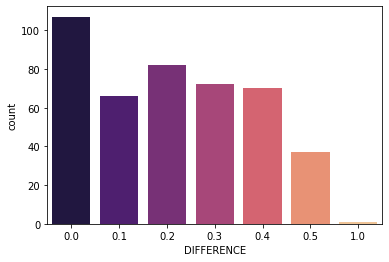

In [37]:
# What differences occur the most?

sns.countplot(data=reviewed,x='DIFFERENCE',palette='magma');

# Part 2: Comparing Fandango ratings with ratings from other websites

In [38]:
sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [40]:
sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

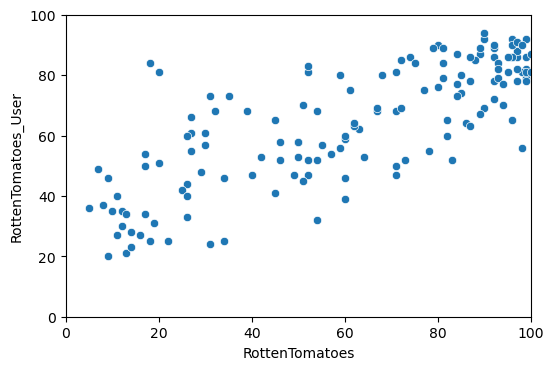

In [45]:
# Scatterplot of Rotten tomatoes critic vs user scores

plt.figure(dpi=100)
sns.scatterplot(data=sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

In [46]:
# Quantify difference between critic and user ratings on rotten tomatoes

sites['RT DIFF'] = sites['RottenTomatoes']-sites['RottenTomatoes_User']

In [47]:
# Mean absolute difference of user vs critic ratings
# Some are positive and some are negative

sites['RT DIFF'].apply(abs).mean()

15.095890410958905

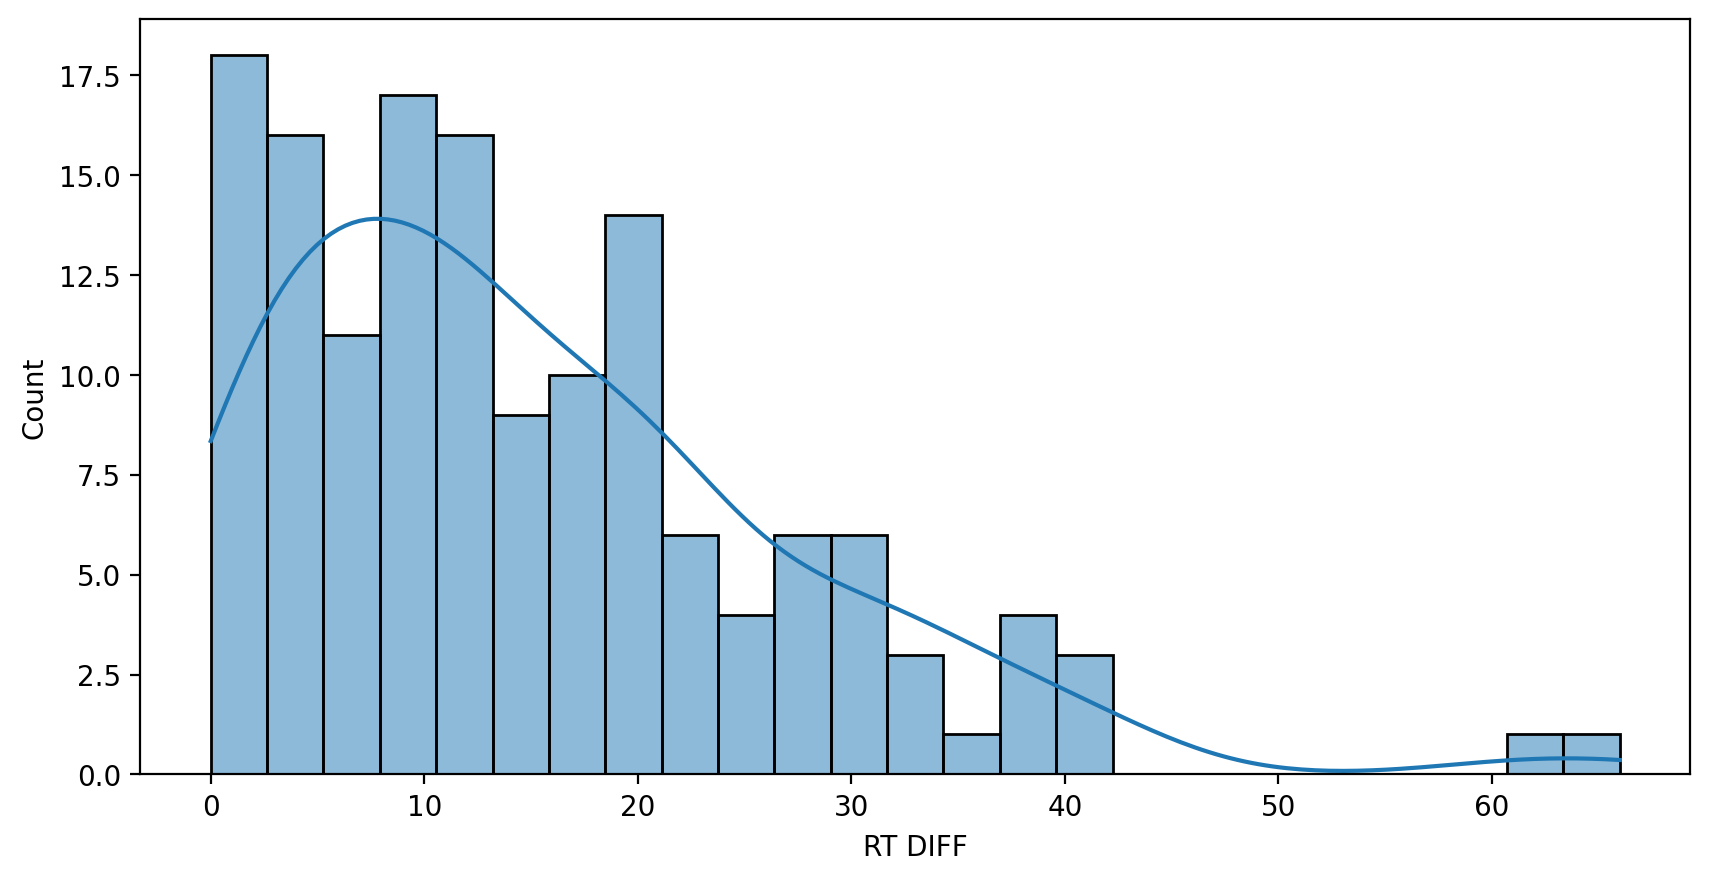

In [53]:
# Plot the mean absolute difference

plt.figure(figsize=(10,5),dpi=200)
sns.histplot(x=sites['RT DIFF'].apply(abs),kde=True,bins=25);

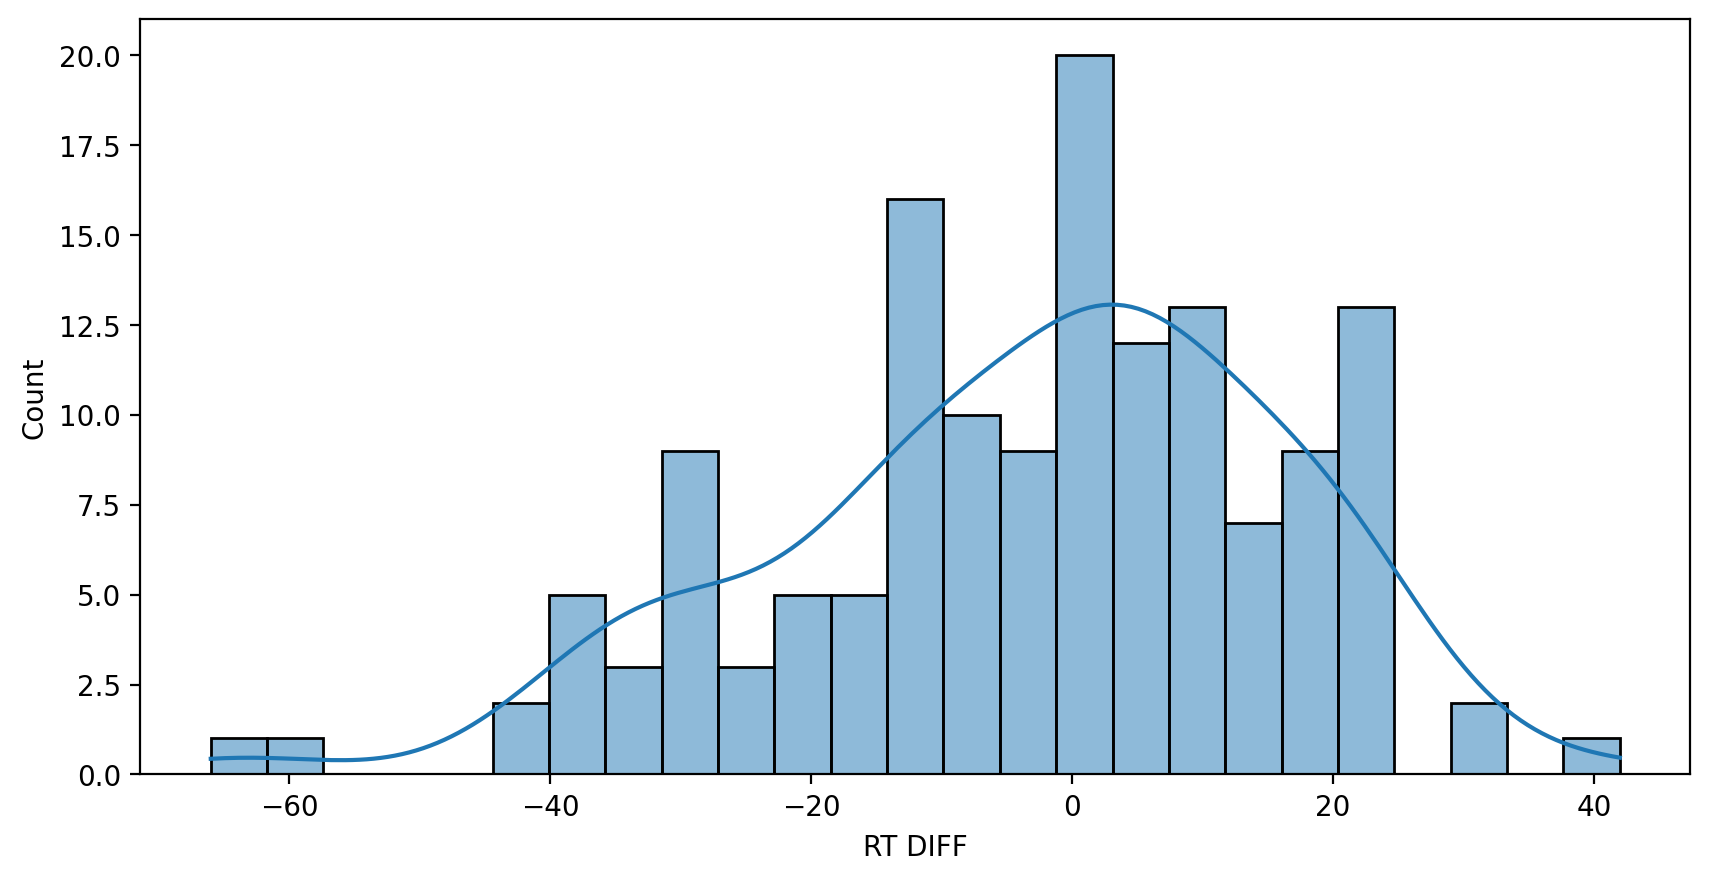

In [54]:
# Plot the difference in reviews with negative values included

plt.figure(figsize=(10,5),dpi=200)
sns.histplot(data=sites,x='RT DIFF',kde=True,bins=25);

In [56]:
# Top 5 moviess that users liked more than critics
sites.nsmallest(5,'RT DIFF')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [57]:
# Top 5 moviess that critics liked more than users
sites.nlargest(5,'RT DIFF')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

(0.0, 100.0)

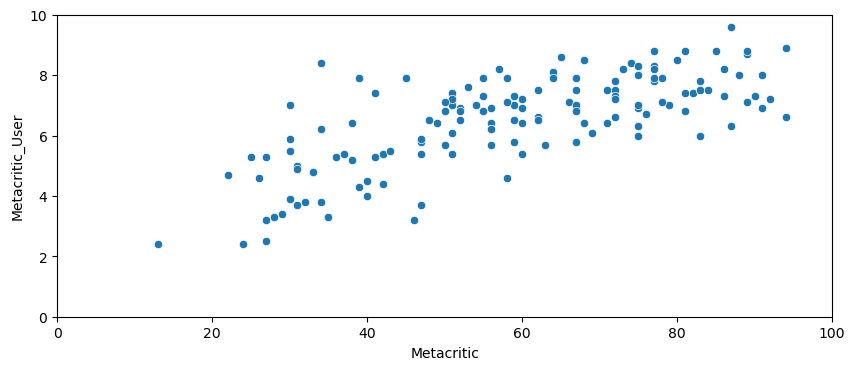

In [60]:
# Analyze scores from metacritic
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data=sites,x='Metacritic',y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

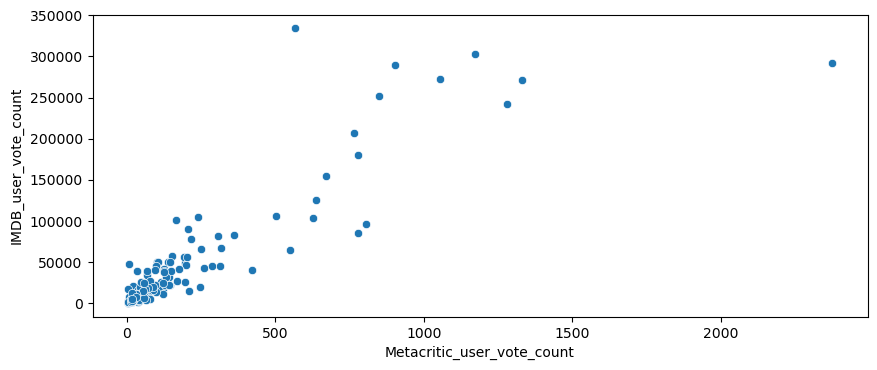

In [64]:
# Analyze vote counts from metacritic vs IMDB

plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data=sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count');


In [67]:
# Analyze the two outlying points
sites.nlargest(1,'IMDB_user_vote_count')


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT DIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [68]:
sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT DIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [69]:
# Compare these scores to Fandango Scores - Are they showing artificially high scores because of a conflict?
# Merge dataframes where movies match 

new = pd.merge(fandango,sites,on="FILM",how='inner')

In [70]:
new

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [71]:
new.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
RT DIFF                           42.0
Name: max, dtype: float64

In [73]:
# normalize the ratings, as not all are between 0-5
# ratings of 100 /20 = 5
# ratings of 10/2 = 5

import numpy as np 
new['RT_Norm'] = np .round(new['RottenTomatoes']/20,1)
new['RTU_Norm'] = np .round(new['RottenTomatoes_User']/20,1)



In [76]:
new['Meta_Norm'] = np .round(new['Metacritic']/20,1)
new['MetaU_Norm'] = np .round(new['Metacritic_User']/2,1)

In [77]:
new['IMDB_Norm'] = np .round(new['IMDB']/2,1)


In [82]:
# With normalized scores - we can now compare to fandango
# Create new dataframe with just normalized scores

norm = new[['RT_Norm','RTU_Norm','Meta_Norm','MetaU_Norm','IMDB_Norm','STARS','RATING']]

In [83]:
norm

,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm,STARS,RATING
0,1.2,2.1,2.3,1.6,2.1,4.0,3.9
1,3.6,4.0,3.0,3.5,3.6,4.5,4.5
2,3.6,4.2,3.6,3.3,3.7,5.0,4.8
3,4.0,4.2,3.4,3.4,3.7,5.0,4.8
4,4.9,4.5,4.7,4.4,4.3,4.5,4.5
...,...,...,...,...,...,...,...
140,4.4,3.2,3.4,3.2,3.4,3.5,3.5
141,4.8,4.0,4.4,3.2,3.5,4.0,3.6
142,4.6,4.2,3.4,3.5,3.9,4.5,4.2
143,4.8,4.3,4.3,3.6,3.7,4.0,3.9


In [98]:
# Move legend (code from creator of seaborn-github)
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

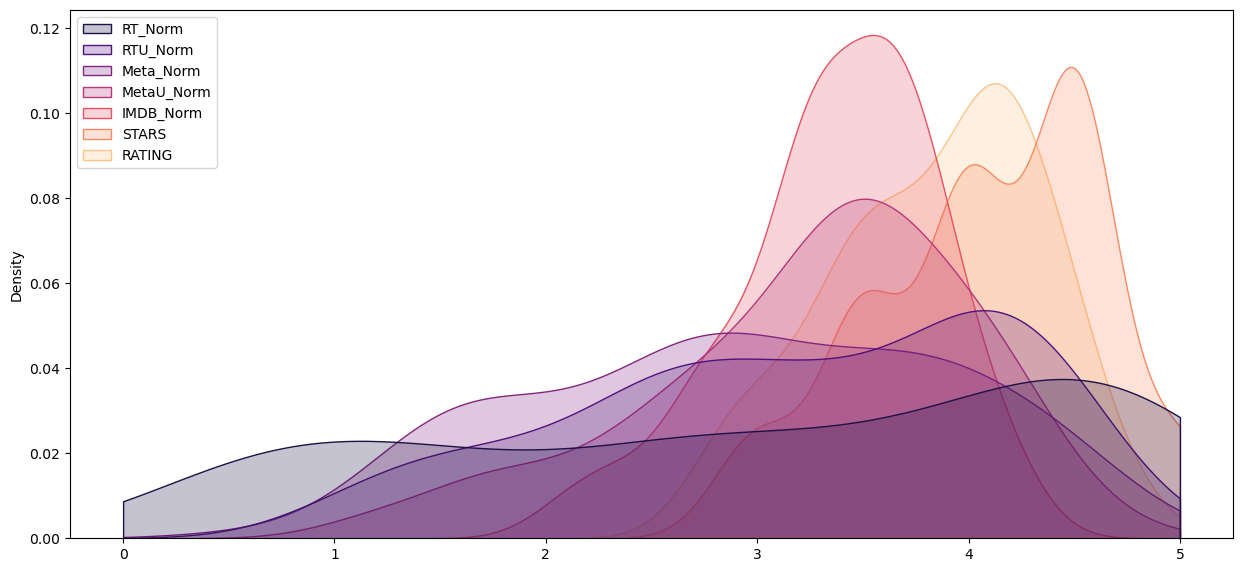

In [101]:
# Visualize wether or not Fandago shows unusually high ratings compared to other sites

fig, ax = plt.subplots(figsize=(15,7),dpi=100)
sns.kdeplot(data=norm,clip=[0,5],shade=True,palette='magma')
move_legend(ax,'upper left')

In [102]:
# Fandango scores are skewed towards the highest scores compared to industry. highest density from 4-4.5

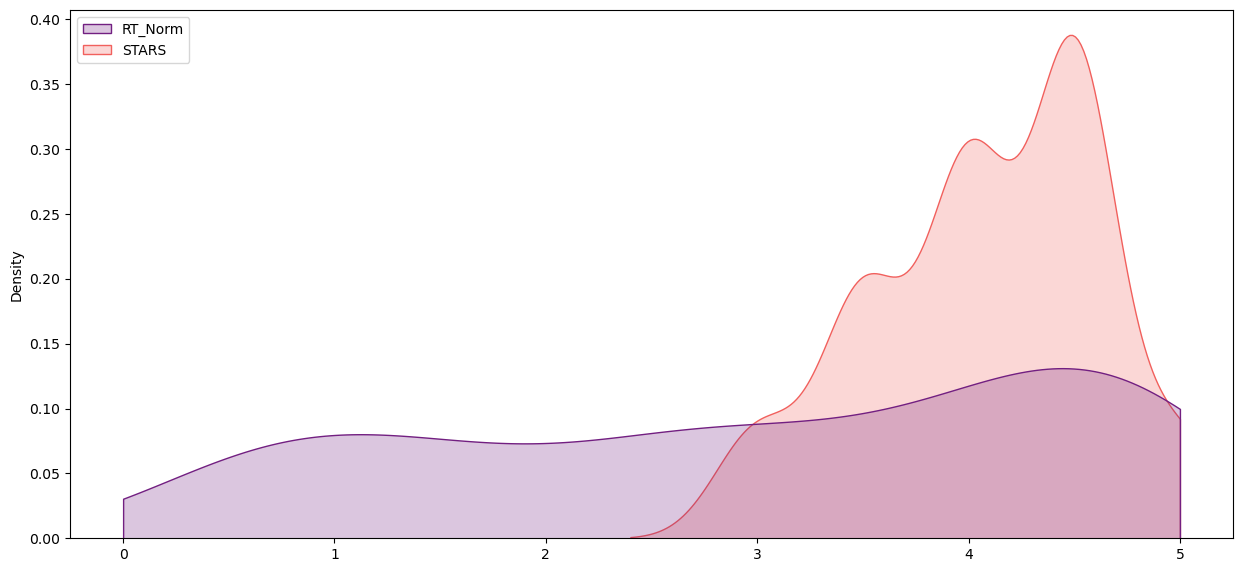

In [103]:
# Density plot comparing RT scores and Stars given by fandango

fig, ax = plt.subplots(figsize=(15,7),dpi=100)
sns.kdeplot(data=norm[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='magma')
move_legend(ax,'upper left')

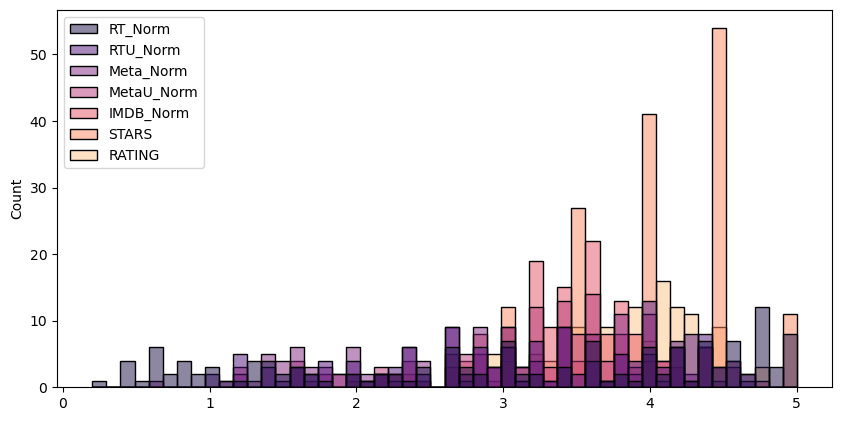

In [108]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(norm,palette='magma',bins=50);

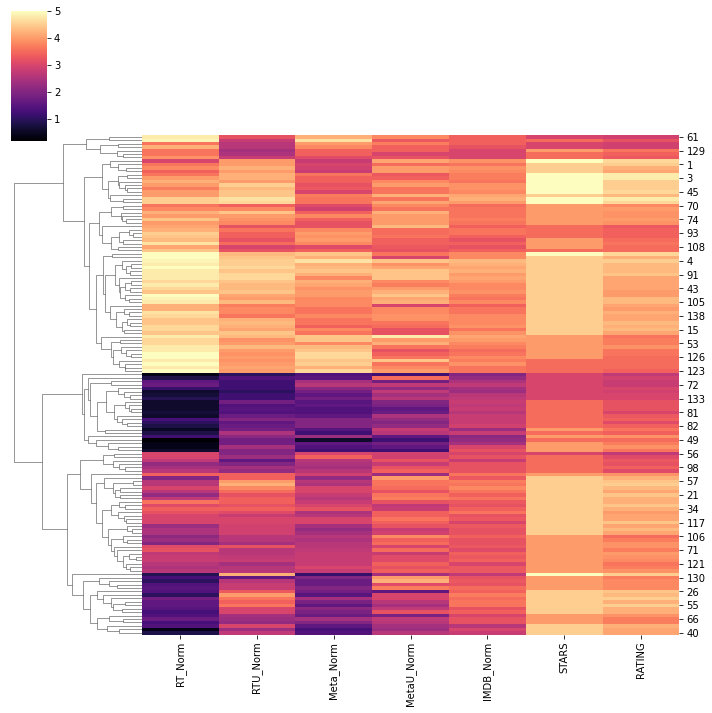

In [109]:
# Clustermap of movie scores

sns.clustermap(norm,cmap='magma',col_cluster=False) # clusters movies together based on rating across all sites

In [ ]:
# Fandangos columns are nowhere near the other sites when it comes to low rqatings
# when comparing darker colors = lower ratings 